# Load Library and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sb

%matplotlib inline

df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Business Understanding

Data science has been a hot topic of discussion lately. Many people want a high-paying job but still have a good work-life balance. But there is news that data scientist is no longer the highest paying job.
So, what is the current salary of a data scientist? is it still worth it to be a dream job? how does it compare to other jobs?

What is the most frequent job title?

Top 3 most frequent job salaries

Average salary by work year

# Data Understanding

In [3]:
df.shape

(607, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

there is no missing value

# Prepare Data

In [11]:
us = df[df['company_location']== 'US']
top10 = us['job_title'].value_counts()[:10]

# What is the most frequent job title?

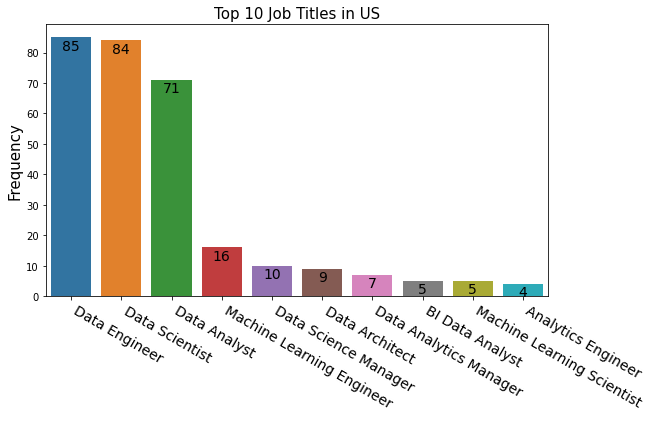

In [12]:
plt.figure(figsize = (9,5))
#plot for first chart
sb.barplot(x = top10.index.values, y = top10)
#adding text on the bar
for i in range (top10.shape[0]): 
    count = top10[i]
    plt.text(i, count-0.5, count, ha = 'center', va='top', color = 'black', fontsize = 14)

#customizing chart
plt.title('Top 10 Job Titles in US', fontsize = 15)
plt.xlabel(' ')
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation=-30, ha ='left', fontsize = 14);

Chart above shows the top 10 job title from 2020–2022 in United State. Data scientist, data engineer and data analyst ranked top 3 frequent job titles, but it can be easily seen that others are also related to those top 3 job titles.

#  Top 3 most frequent job salaries

In [13]:
#filtering data
salary = df[['experience_level', 'job_title','salary_in_usd']]
da = salary[salary['job_title'].str.contains("Data Analyst")]
de = salary[salary['job_title'].str.contains("Data Engineer")].drop(41) #dropping suspicious row
ds = salary[salary['job_title'].str.contains("Data Scientist")]

making new dataframe

In [14]:
en = ds[ds['experience_level']== 'EN'].groupby(['job_title']).mean().reset_index()
mi = ds[ds['experience_level']== 'MI'].groupby(['job_title']).mean().reset_index()
se = ds[ds['experience_level']== 'SE'].groupby(['job_title']).mean().reset_index()
ex = ds[ds['experience_level']== 'EX'].groupby(['job_title']).mean().reset_index()

en.insert(1, column = 'level', value = 'Entry')
mi.insert(1, column = 'level', value = 'Junior')
se.insert(1, column = 'level', value = 'Senior')
ex.insert(1, column = 'level', value = 'Executive')
    
DataFrame = [en, mi, se, ex] 
dsm = pd.concat(DataFrame).drop_duplicates().reset_index(drop=True)
dsm = dsm.groupby(['level']).mean().reset_index()
dsm.insert(0,column="title", value="Data Scientist")

en = de[de['experience_level']== 'EN'].groupby(['job_title']).mean().reset_index()
mi = de[de['experience_level']== 'MI'].groupby(['job_title']).mean().reset_index()
se = de[de['experience_level']== 'SE'].groupby(['job_title']).mean().reset_index()
ex = de[de['experience_level']== 'EX'].groupby(['job_title']).mean().reset_index()


en.insert(1, column = 'level', value = 'Entry')
mi.insert(1, column = 'level', value = 'Junior')
se.insert(1, column = 'level', value = 'Senior')
ex.insert(1, column = 'level', value = 'Executive')

DataFrame = [en, mi, se, ex] 
dem = pd.concat(DataFrame).drop_duplicates().reset_index(drop=True)
dem = dem.groupby(['level']).mean().reset_index()
dem.insert(0,column="title", value="Data Engineer")

en = da[da['experience_level']== 'EN'].groupby(['job_title']).mean().reset_index()
mi = da[da['experience_level']== 'MI'].groupby(['job_title']).mean().reset_index()
se = da[da['experience_level']== 'SE'].groupby(['job_title']).mean().reset_index()
ex = da[da['experience_level']== 'EX'].groupby(['job_title']).mean().reset_index()

en.insert(1, column = 'level', value = 'Entry')
mi.insert(1, column = 'level', value = 'Junior')
se.insert(1, column = 'level', value = 'Senior')
ex.insert(1, column = 'level', value = 'Executive')

DataFrame = [en, mi, se, ex] 
dam = pd.concat(DataFrame).drop_duplicates().reset_index(drop=True)
dam = dam.groupby(['level']).mean().reset_index()
dam.insert(0,column="title", value="Data Analyst")

print(dam)
print(dem)
print(dsm)

          title      level  salary_in_usd
0  Data Analyst      Entry   66411.916667
1  Data Analyst  Executive  135000.000000
2  Data Analyst     Junior  116558.672414
3  Data Analyst     Senior  120494.525926
           title      level  salary_in_usd
0  Data Engineer      Entry   44818.416667
1  Data Engineer  Executive  321229.000000
2  Data Engineer     Junior   64823.932075
3  Data Engineer     Senior  154692.763039
            title      level  salary_in_usd
0  Data Scientist      Entry   82683.954545
1  Data Scientist  Executive  416000.000000
2  Data Scientist     Junior  113414.533333
3  Data Scientist     Senior  167939.083279


In [15]:
salary2 = [dam,dem,dsm]
new_df = pd.concat(salary2)
new_df

,title,level,salary_in_usd
0,Data Analyst,Entry,66411.916667
1,Data Analyst,Executive,135000.000000
2,Data Analyst,Junior,116558.672414
3,Data Analyst,Senior,120494.525926
0,Data Engineer,Entry,44818.416667
1,Data Engineer,Executive,321229.000000
2,Data Engineer,Junior,64823.932075
3,Data Engineer,Senior,154692.763039
0,Data Scientist,Entry,82683.954545
1,Data Scientist,Executive,416000.000000


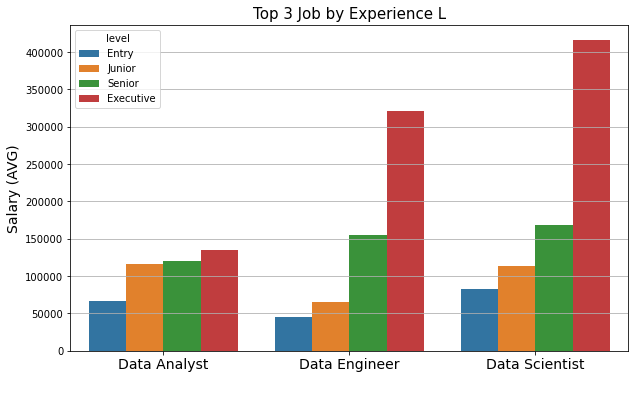

In [16]:
plt.figure(figsize = (10,6))

#plot the second bar
sb.barplot(data = new_df, x = 'title', y = 'salary_in_usd', hue = 'level', hue_order = ['Entry', 'Junior', 'Senior', 'Executive'])

#customizing chart
plt.title('Top 3 Job by Experience L', fontsize = 15)
plt.xlabel(" ")
plt.ylabel('Salary(AVG)', fontsize = 14)
plt.ylabel("Salary (AVG)", fontsize = 14)
plt.grid(axis = 'y')
plt.xticks(fontsize = 14)
plt.show();


Data above including every job title that contains data analyst, data scientist, and data engineer. We can see that there is no significant difference in data analyst salaries for each level.

On average, data scientist salaries are higher than data analysts and data engineers at every level, with executive data scientists over 400k followed by executive data analysts over 250k.

# Average salary by work year

In [11]:
#data wrangling third chart
w2020 = df.loc[(df['work_year'] == 2020)]
w2021 = df.loc[(df['work_year'] == 2021)]
w2022 = df.loc[(df['work_year'] == 2022)]
hist_data = [w2020['salary_in_usd'],w2021['salary_in_usd'],w2022['salary_in_usd']]
group_labels = ['2020 salary','2021 salary','2022 salary']
colors = ['white','red','blue']

#making datframe for third chart
year_salary = pd.DataFrame(columns=['2020','2021','2022'])
year_salary['2020'] = w2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary.values.tolist()[0]

[95813.0, 99853.79262672811, 124522.00628930818]

''

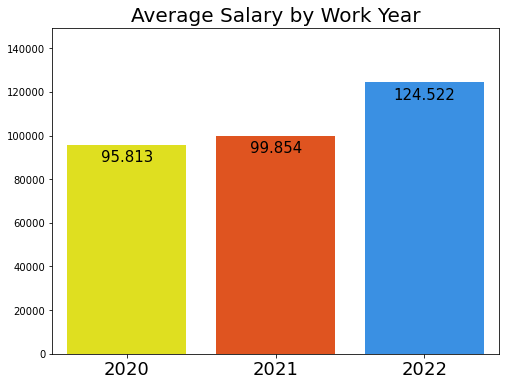

In [12]:
x = year_salary.columns
y = year_salary.values.tolist()[0]

plt.figure(figsize = (8,6))

#plot third chart
fig2 = sb.barplot(x = x, y = y, palette = ['yellow', 'orangered', 'dodgerblue'])
#adding text to the bar
fig2.bar_label(fig2.containers[0], label_type='edge', labels = np.round([num/1000 for num in y], 3), padding = -20, fontsize = 15)

#customizing chart
fig2.margins(y=0.2)

plt.xticks(fontsize = 18)
plt.title('Average Salary by Work Year', fontsize = 20)
;

We can see the average salary increase every year with the highest in 2022 of 124.5k, with levels in 2021 and 2020 are about the same.

# Evalutaion

Data-related jobs are in high demand, and it’s never too late to learn about the industry if you want a high-paying job and work-life balance.

We hope there will be tools to help people become data scientists, but keep in mind that there is no easy way to become successful.